## 1. Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC




## 2. Exploring the dataset:

In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [6]:
data.shape

(299, 13)

#### Note:
We have 299 lines and 13 columns

In [7]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [9]:
# profile = ProfileReport(data)

In [10]:
#We split our dataset into two categorical for grouping and continuous for 

categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

#### Understanding Categorical data:
Anaemia : 0 means that the person does not have anaemia. 1 means they do.

Diabetes : 0 means that the person does not have diabetes. 1 means they do.

High_blood_pressure : 0 means that the person does not have high_blood_pressure. 1 means they do.

Smoking : 0 means that the person does not smoke. 1 means they do.

Sex : 0 is female, 1 is male.

DEATH_EVENT : 0 means heart failure is not the cause of the death. ! means heart failure is the cause.

In [11]:
pd.set_option('display.max_rows', 50) # set to a lower value for faster processing
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Note : 
we can see that there is no missing data in our dataset

In [12]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Note:
We can see that the dataset does not contain null values

In [13]:
"""
describe() function helps us with the descriptive statistics.
like mean, standard deviation, minimum, maximum values
"""

continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [14]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


#### Note:
Since our result is DEATH_EVENT, we grouped our dataset based on DEATH_EVENT and we can deduce that our dataset is unbalanced as out of 299 people 96 died of hear disease and 203 did not.

In [15]:
age = data[["age"]]
serum_sodium = data[["serum_sodium"]]

In [16]:
type(data[['age']])

pandas.core.frame.DataFrame

In [17]:
data['serum_sodium']

0      130
1      136
2      129
3      137
4      116
      ... 
294    143
295    139
296    138
297    140
298    136
Name: serum_sodium, Length: 299, dtype: int64

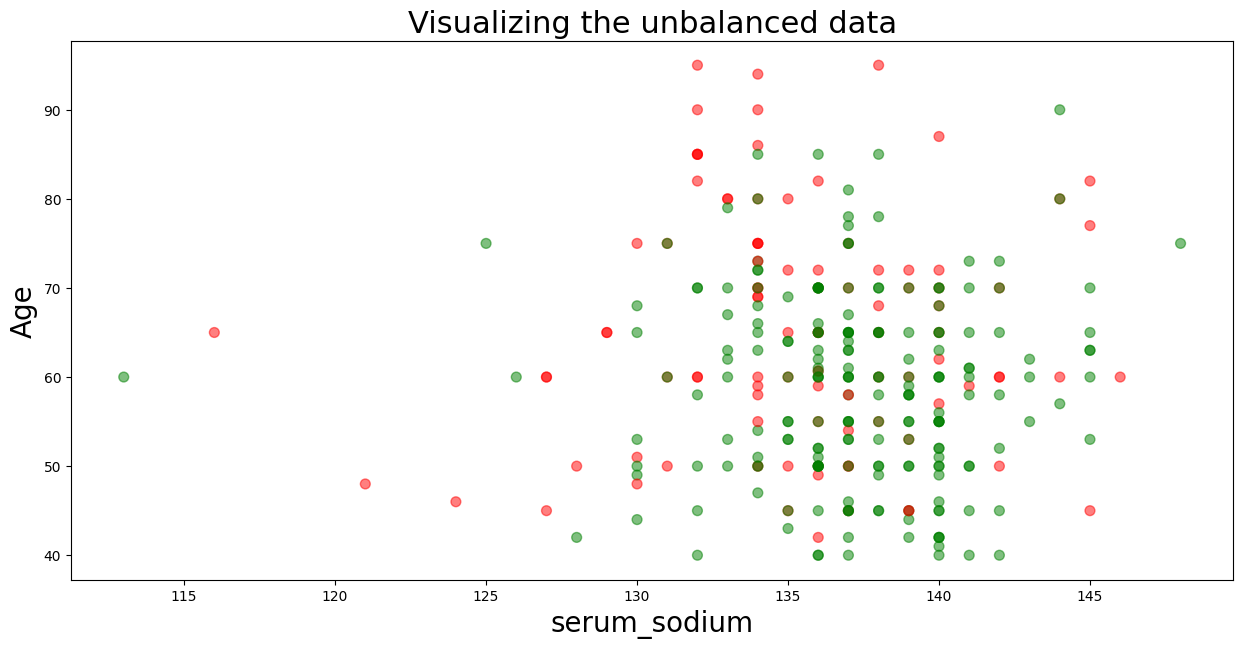

In [18]:
#Visualizing the unbalanced data with a scatter plot, the colors will depend on DEATH_EVENT (0 or 1)

plt.figure(figsize=(15,7))
colors = ['Green' if event == 0 else 'Red' for event in data['DEATH_EVENT']]
plt.scatter(serum_sodium, age, c = colors, s=50, alpha=0.5)
plt.xlabel("serum_sodium", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

#### Observation:
The red dots show death with serum sodium on the X-axis and age on the Y-axis

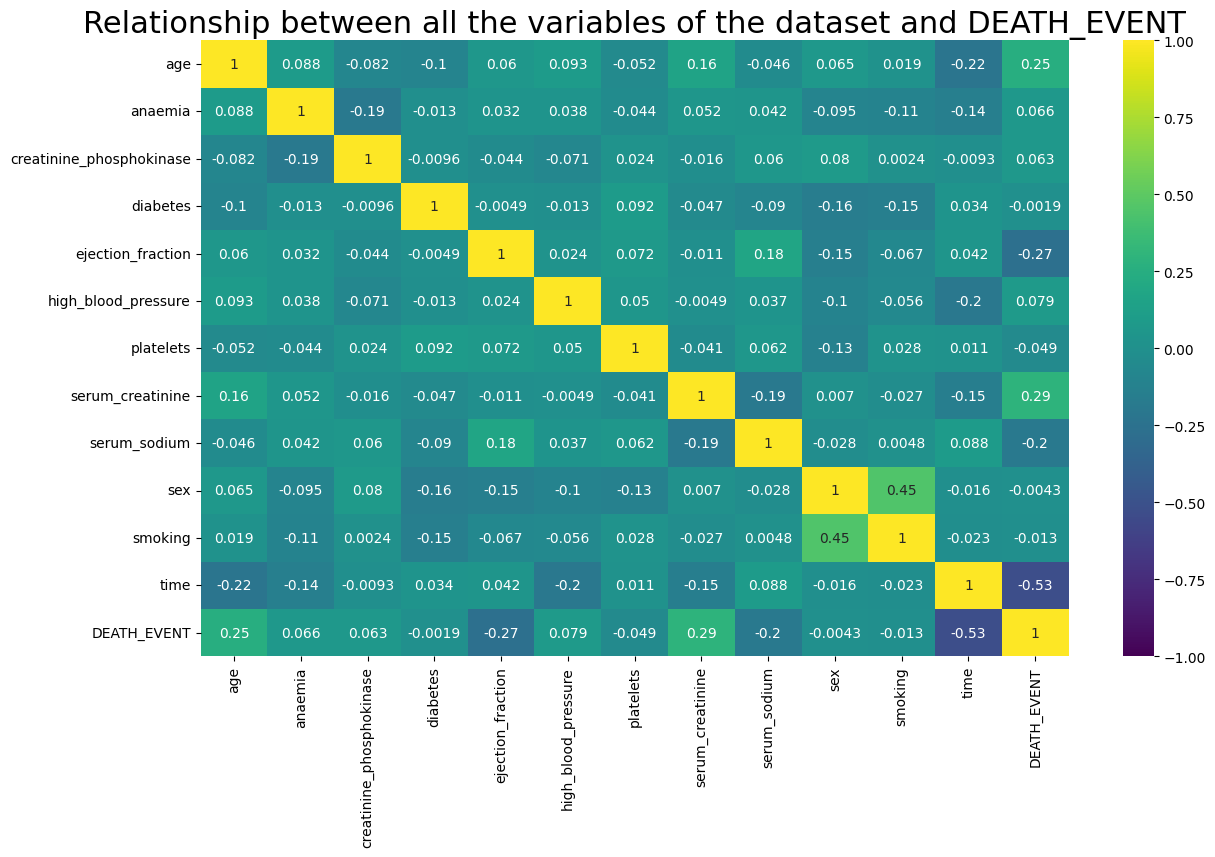

In [19]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()

#### Note:
We notice that there is a positive correlation between DEATH_EVENT and serum creatinine and age.
We have also a negative correlation between DEATH_EVENT and time, ejection fraction and serum sodium.


In [20]:
# df = data.corr()
# data_anaemia = df["anaemia"]
# print(data_anaemia)

## 2. Data visualization:

In [21]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

### Plotting the impact of categorical variables on DEATH_EVENT

In [22]:
for i,cat in enumerate(categorical_data):
    print(i, cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


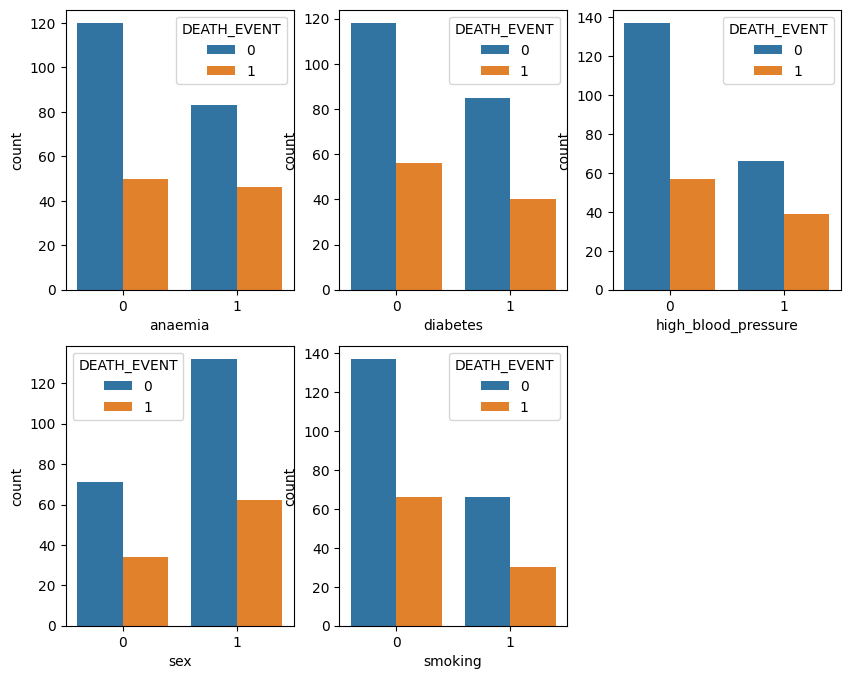

In [23]:
plt.figure(figsize=(10,8))
#loop through all the categorical elements and plot out each one.
for i,cat in enumerate(categorical_data):
#There are 2 rows and 3 columns and 
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

### Plotting the impact of continuous variables on DEATH_EVENT

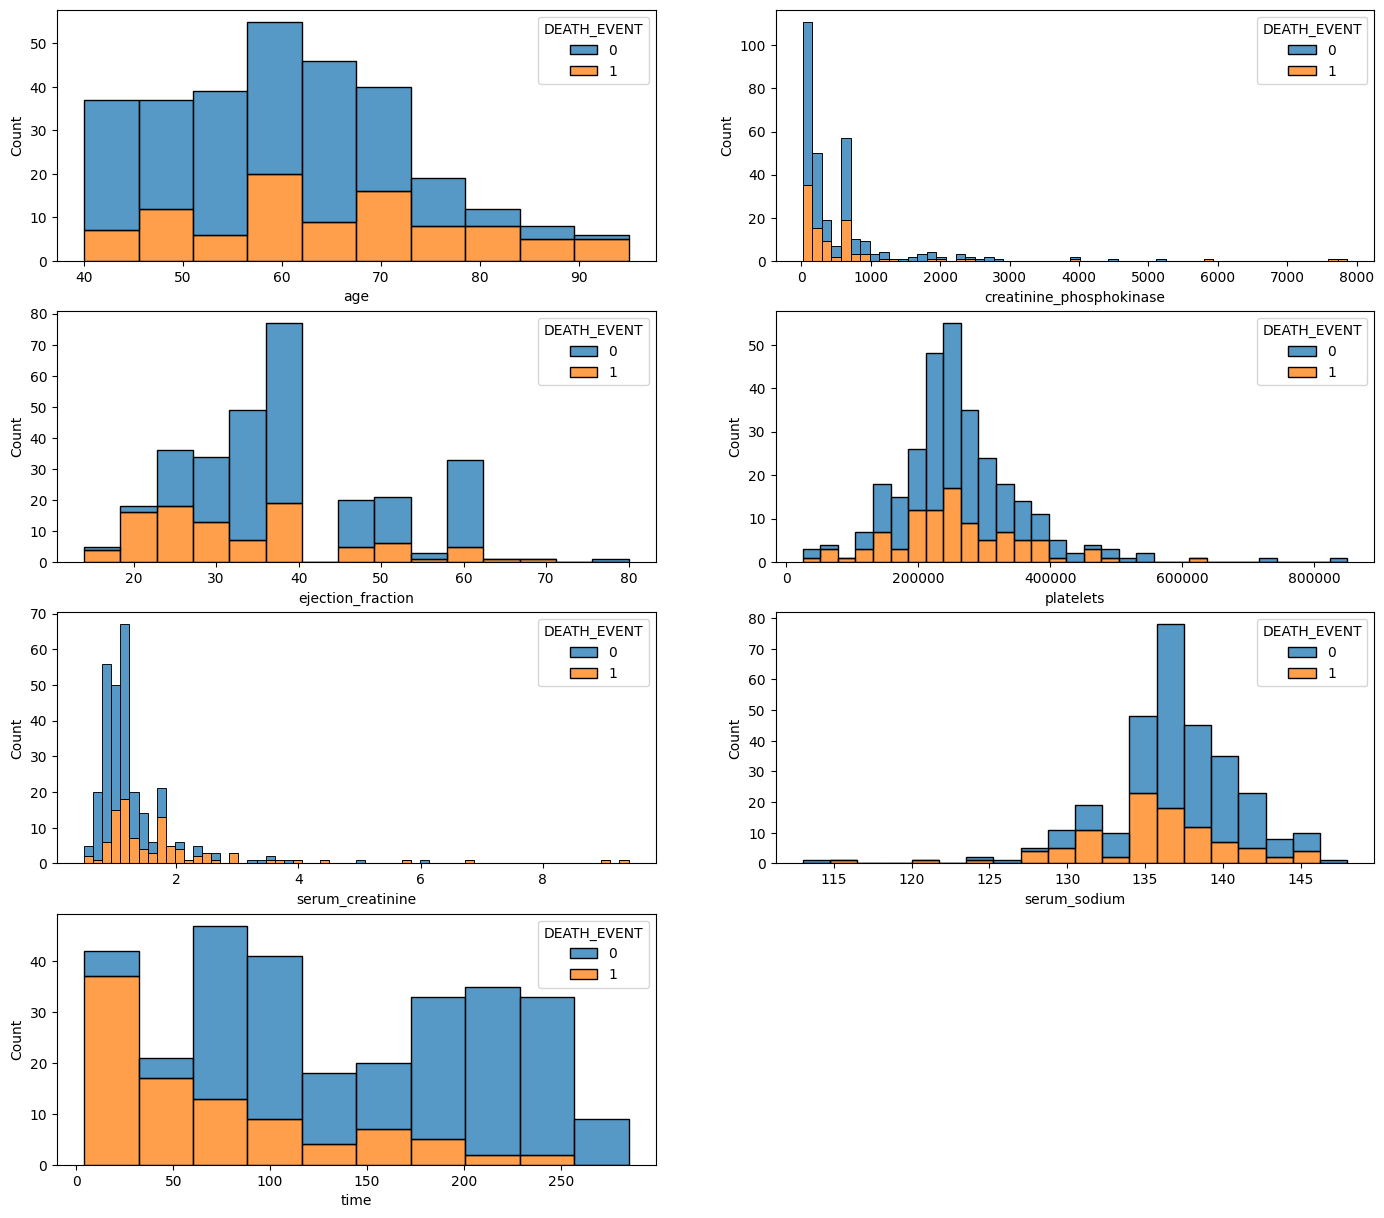

In [24]:
plt.figure(figsize=(17,15))
for j,cont in enumerate(continuous_data):
    plt.subplot(4,2,j+1)
    sns.histplot(data = data, x= cont, hue = "DEATH_EVENT", multiple="stack")
plt.show()

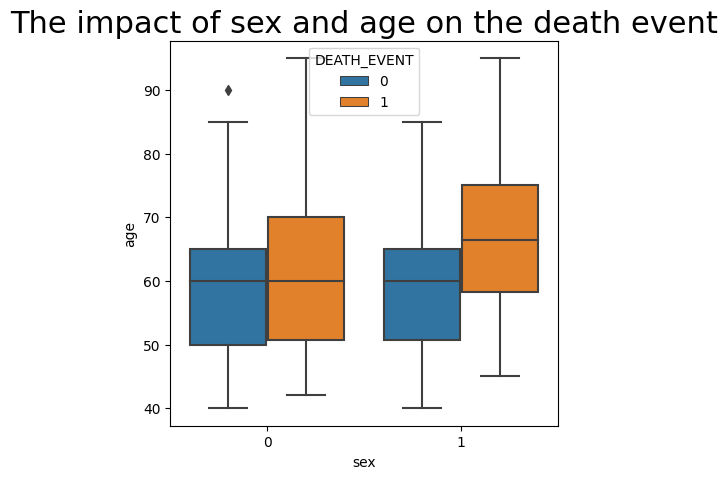

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("The impact of sex and age on the death event", fontsize=22)
plt.show()

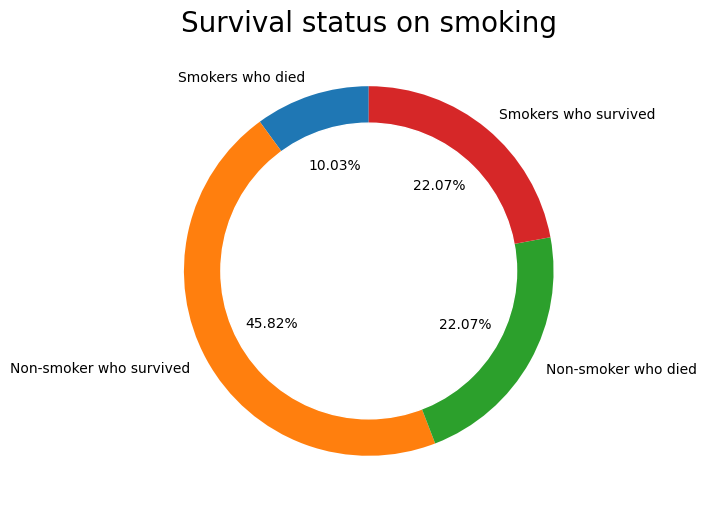

In [26]:
# Analyzing the survival status on smoking

smokers = data[data["smoking"]==1]
non_smokers = data[data["smoking"]==0]

smokers_who_died = smokers[smokers["DEATH_EVENT"]==1]
non_smokers_who_survived = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_smokers_who_died = non_smokers[non_smokers["DEATH_EVENT"]==1]
smokers_who_survived = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(smokers_who_died), len(non_smokers_who_survived),len(non_smokers_who_died),len(smokers_who_survived)]
smoking_labels = ["Smokers who died", "Non-smoker who survived", "Non-smoker who died", "Smokers who survived"]

plt.figure(figsize=(6,6))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=20)
plt.show()

([<matplotlib.patches.Wedge at 0x2596f9ec910>,
 [Text(-0.34101771647194173, 1.045804435376071, 'Smokers who died'),
  Text(-0.9658242801224177, -0.5264821553728236, 'Non-smoker who survived'),
  Text(0.9602393822474176, -0.5366007163441904, 'Non-smoker who died'),
  Text(0.7031236200758868, 0.8459415907090634, 'Smokers who survived')],
 [Text(-0.18600966353015, 0.5704387829324022, '10.0%'),
  Text(-0.5268132437031369, -0.28717208474881284, '45.8%'),
  Text(0.5237669357713186, -0.2926912998241038, '22.1%'),
  Text(0.3835219745868473, 0.4614226858413072, '22.1%')])

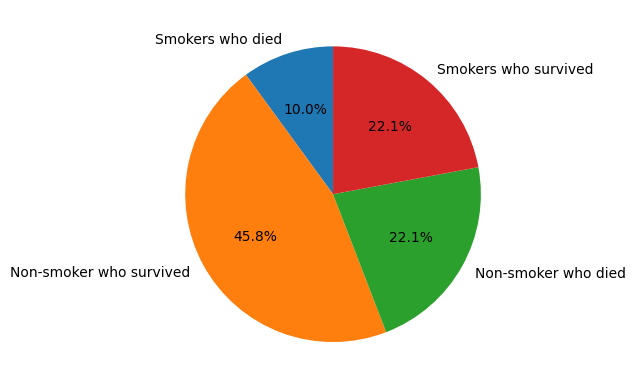

In [27]:
plt.pie(smoking_data, labels = smoking_labels, autopct='%.1f%%', startangle=90)

In [59]:
smokers[smokers["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


In [38]:
male = data[data["sex"]==1]
male

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


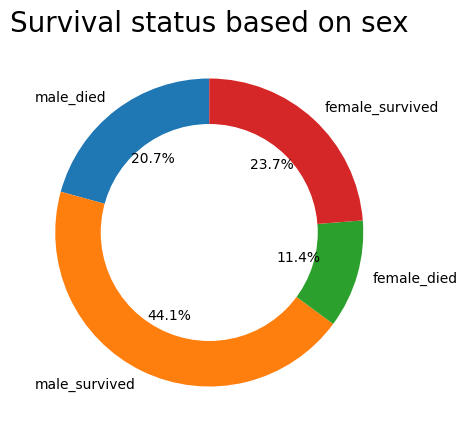

In [39]:
# Analyzing the survival status on sex

male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]
sex_labels = ["male_died","male_survived","female_died","female_survived"]

plt.figure(figsize=(5,5))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status based on sex", fontsize=20)
plt.show()

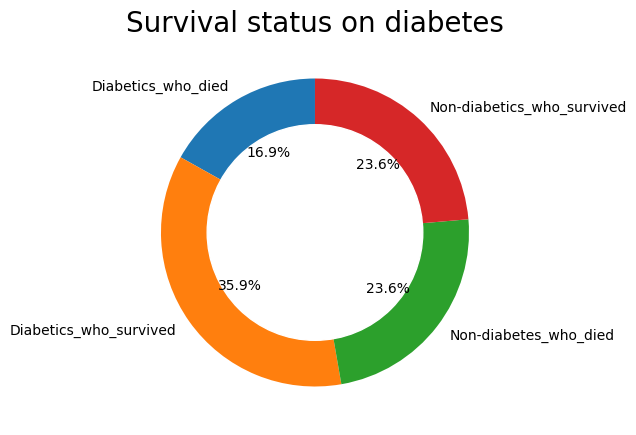

In [49]:
# Analyzing the survival status on diabetes

with_diabetes = data[data["diabetes"]==1]
without_diabetes = data[data["diabetes"]==0]

Diabetics_who_died = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
Diabetics_who_survived = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
Non_diabetics_who_died = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
Non_diabetics_who_survived = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(Diabetics_who_died), len(Diabetics_who_survived), len(Non_diabetics_who_died), \
                 len(Non_diabetics_who_died)]
diabetes_labels = ["Diabetics_who_died","Diabetics_who_survived","Non-diabetes_who_died",\
                   "Non-diabetics_who_survived"]

plt.figure(figsize=(5,5))
plt.pie(diabetes_data, labels = diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=20)
plt.show()

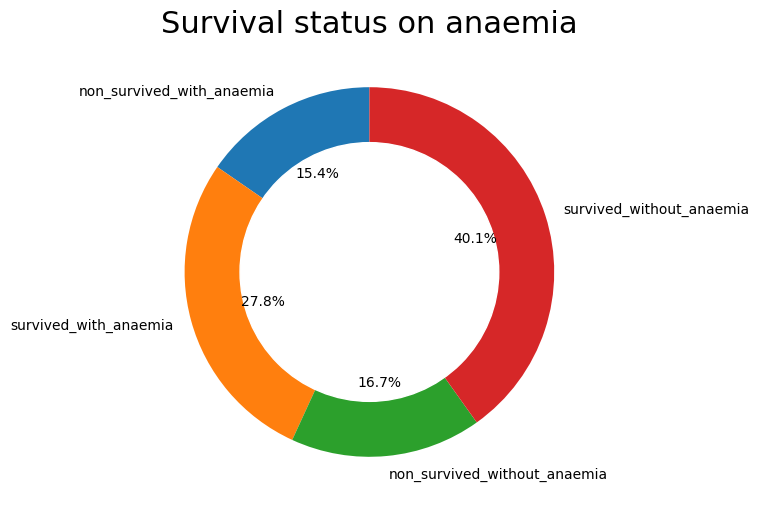

In [51]:
# Analyzing the survival status on anaemia

with_anaemia = data[data["anaemia"]==1]
without_anaemia = data[data["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), \
                len(survived_without_anaemia)]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia",\
                  "survived_without_anaemia"]

plt.figure(figsize=(6,6))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

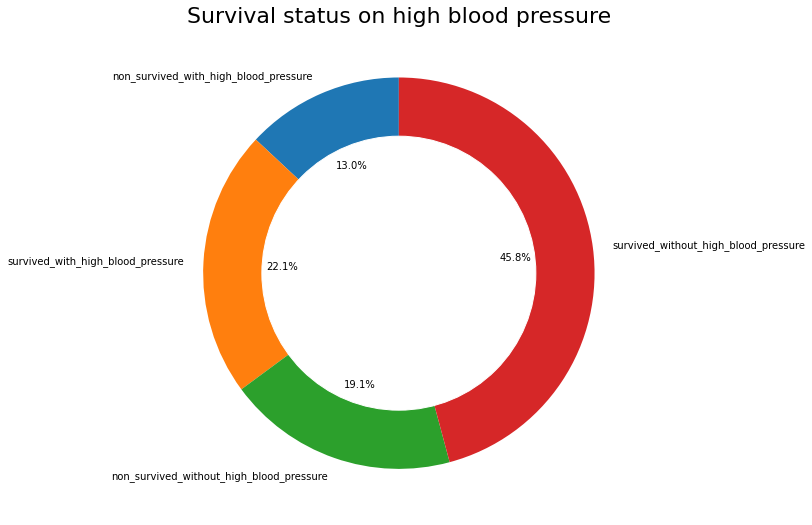

In [36]:
# Analyzing the survival status on high blood pressure

with_high_blood_pressure = data[data["high_blood_pressure"]==1]
without_high_blood_pressure = data[data["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), \
                            len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=22)
plt.show()

## 3. Data modeling & prediction using continuous data:

In [52]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [55]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [86]:
 accuracy_list = [] #list to save all the values for different models accuracies for comparaison using a bar chart

### 3.1 Logistic Regression

In [57]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(lr_accuracy)

### 3.2 Support Vector Machine

In [58]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)

### 3.3 KNearestNeighbor:

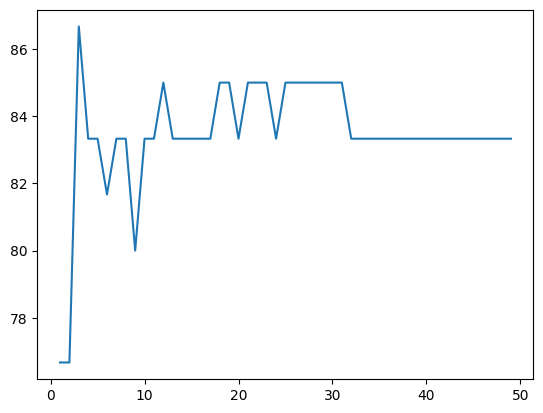

In [59]:
# We use this program to find the optimal value of k
knn_list = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(knn_accuracy)

### 3.4 Decison Tree Classifier

In [61]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

### 3.5 Naive Bayes 

In [62]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)

### 3.6 Random Forest Classifier

In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

In [64]:
accuracy_list

[86.67, 85.0, 81.67, 90.0, 76.67, 93.33]

In [66]:
models = ["Logistic Regression","SVC","KNearestNeighbors","Decision Tree","Naive Bayes","Random Forest"]

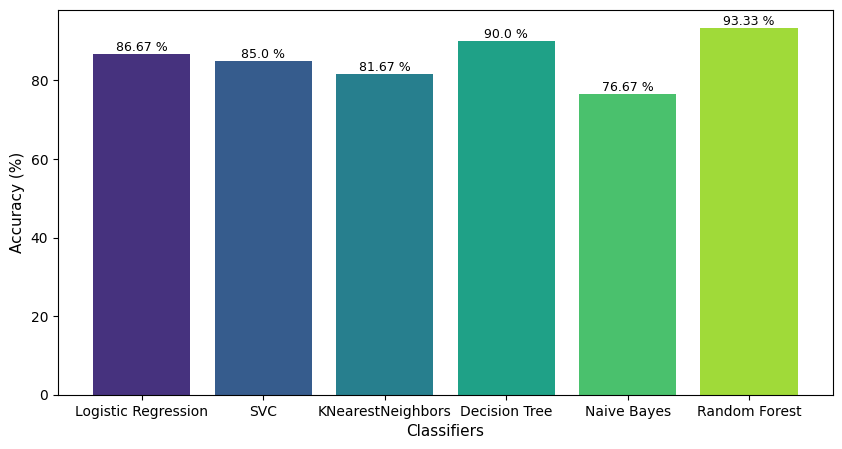

In [85]:
# Define a color palette
colors = sns.color_palette('viridis')

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_list, color=colors)
plt.xlabel("Classifiers", fontsize=11)
plt.ylabel("Accuracy (%)", fontsize=11)

# Annotate the bars with accuracy percentages
for i, acc in enumerate(accuracy_list):
    plt.text(i, acc, f"{acc} %", ha='center', va='bottom', fontsize=9)


# Show the plot
plt.show()